# 2022-1 제 1회 인사이콘 : HR Analytics - How to reduce Employee Turnover?

## Dataset
1. **WA_Fn-UseC_-HR-Employee-Attrition.csv**
- HR 데이터가 담겨있는 데이터셋입니다. **해당 파일의 데이터를 이용해서 EDA 및 Feature Engineering을 진행합니다.**
2. **WA_Fn-UseC_-HR-Employee-Attrition.xlsx**
- sheet 1: HR 데이터의 가독성을 위해 정리된 시트입니다. csv 파일과 동일한 내용입니다.
- sheet 2(Variable Dictionary): 각 변수들에 대한 설명이 담겨있습니다.

## General Guideline:

주어진 HR 데이터를 통해 **종업원 퇴사의 주된 원인을 탐색 및 시각화하여, 경영진에게 인사이트 및 문제에 대한 해결방안을 도출하는** case 입니다.

권장하는 진행 순서는 다음과 같습니다.

1. **EDA + Feature Engineering**
- 데이터에 대한 EDA 및 Feature Engineering을 진행하여 활용할 Feature들을 확정합니다. 
2. **Interpretation**
- Employee Turnover에 영향을 미치는 변인과 그 관계를 탐색 및 해석합니다.
3. **Insight**
- 분석 결과를 바탕으로 인사이트를 도출하여, 경영진에게 Employee Turnover 제고 전략을 제시합니다.
4. **presentation**
- 주피터 노트북 or 노션 페이지로 자료를 정리 및 발표합니다.

# EDA + Feature Processing

EDA 및 Feature Processing을 진행하고, 활용할 Feature들을 확정합니다.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


# 자유롭게 EDA 및 Feature Processing 진행

- 소설부터 써보자
- 퇴사의 원인을 알아보는 EDA, 목표는 경영진에게 퇴사의 원인에 대한 INSIGHT를 제공하고 
- 해결방안을 제시해야 한다.
- 1. 자발적 이직을 막는 것
> 통제할 수 있는 변인으로 해결 할 수 있다.

- 2. turnover 할 수 있는 사람을 뽑지 않는 것 
> 사람을 뽑기 전에 알 수 있는 데이터(교육수준)로 알 수 있을 거 같다. 

- columns 을 분류할 수 있을 거 같다. 경영진이 control 가능한 변수, 경영진이 control 할 수 없는 변수. 
- control 할 수 있는것
> 퇴사 여부, 출장 빈도, 일급, 부서, 직무수준, 직무역할 

- control 할 수 없는것
> 교육 수준, 교육 분야

- 업무 환경 만족도, 직무 만족도,  > 너무 당연함 

- 3. 핵심인재와 다른 그룹과의 비교.
> 핵심인재의 자발적 이직 관리가 회사의 경영진 그룹에서 가장 중요함. 핵심적 인재의 특징 > 다른 그룹과 비교
> 핵심인재를 어떻게 정의 할 수 있을까?
> 1. 임금상승률이 높은 사람들로 간접적으로 알 수 있을것이라 생각 

# 활용할 최종 Feature 확정
- DailyRate : 일급 (ㅇ)
- DistanceFromHome : 통근거리 
- HourlyRate : 시급 (ㅇ)
- MonthlyIncome : 월 소득 (ㅇ)
- MonthlyRate : 월급 (ㅇ)
- PercentSalaryHike : 임금 상승률  
- StockOptionLevel : 스톡 옵션 레벨 

>Guide line 일급, 시급, 월급 , 월소득, 그냥 합쳐서 하나로 만들어도 될거 같다. 
>아니면 월소득, 월급 만 써도 될거같다
>분포가 월급 시급 일급이 같다 
>일급+ 시급+ 월급 + 월소득 4개의 평균을 같게 만들어주고 합친다음에 한 사람의 임금 수준을 나타낼 수 있음 

>모든 변수가 int 로 되어 있기 때문에 효율적인 시각화를 위해서 그룹을 나눌 예정
>임금 상승률이 높은 그룹은 핵심 인재 그룹이라고 할 수 있을 것이다. 

>임금 상승률이 높은 그룹중에 



          HourlyRate                           
               count  max min       mean median
Attrition                                      
No              1233  100  30  65.952149     66
Yes              237  100  31  65.573840     66


          MonthlyRate                                  
                count    max   min          mean median
Attrition                                              
No               1233  26997  2094  14265.779400  14120
Yes               237  26999  2326  14559.308017  14618


          MonthlyIncome                                 
                  count    max   min         mean median
Attrition                                               
No                 1233  19999  1051  6832.739659   5204
Yes                 237  19859  1009  4787.092827   3202


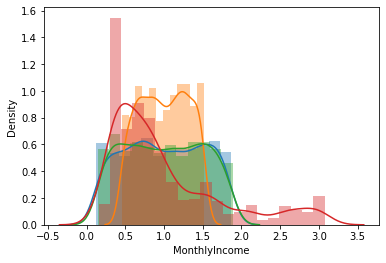

In [6]:
#Rate , MonthlyIncome 확인 

import matplotlib.pylab as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

# col = ['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate'
#        , 'PercentSalaryHike', 'StockOptionLevel']

# data.info()

sns.distplot(data['DailyRate']/np.mean(data['DailyRate']))
sns.distplot(data['HourlyRate']/np.mean(data['HourlyRate']))
sns.distplot(data['MonthlyRate']/np.mean(data['MonthlyRate'])) 
sns.distplot(data['MonthlyIncome']/np.mean(data['MonthlyIncome'])) 

# 시급만 분포가 조금더 좁음
# 일급과, 월급은 분포가 똑같음 

print("\n")
print(data.groupby('Attrition')[['HourlyRate']].agg(['count', 'max', 'min', 'mean', 'median']))
print("\n")
print(data.groupby('Attrition')[['MonthlyRate']].agg(['count', 'max', 'min', 'mean', 'median']))
print("\n")
print(data.groupby('Attrition')[['MonthlyIncome']].agg(['count', 'max', 'min', 'mean', 'median']))

#Monthly Income과 Attrition은 음의 상관관계 


1. HourlyRate, MonthlRate, DailyIncome은 분포가 거의 비슷하고, Attirion에 따라 차이가없음
> 세 변수중 MonthlyRate 만 그룹을 나눠서 사용할 계획 
2. MonthlyIncome 은 차이가 있음. 평균적으로 월소득이 낮은 사람이 이직을 더 많이 함.
> MonthlyIncome 은 유의미한 변수로 보임 


          PercentSalaryHike                          
                      count max min       mean median
Attrition                                            
No                     1233  25  11  15.231144     14
Yes                     237  25  11  15.097046     14


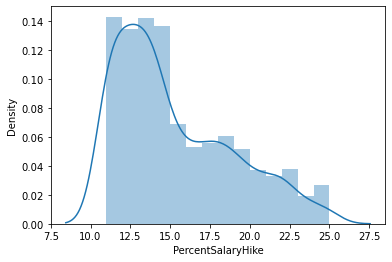

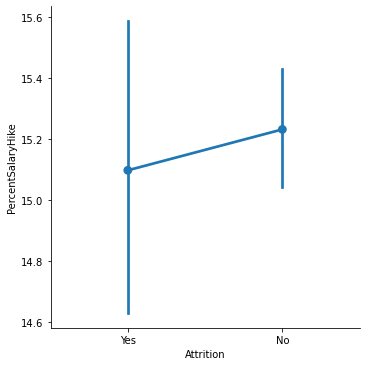

In [7]:
#임금상승률

sns.distplot(data['PercentSalaryHike'])
print(data.groupby('Attrition')[['PercentSalaryHike']].agg(['count', 'max', 'min', 'mean', 'median']))
sns.factorplot('Attrition', 'PercentSalaryHike', data=data) 

#Attrition에 PercentSalaryHike 는 큰 영향을 미치지 않아 보임
#다른 변수와 함께보아야 할것으로 보임 

          DistanceFromHome                          
                     count max min       mean median
Attrition                                           
No                    1233  29   1   8.915653      7
Yes                    237  29   1  10.632911      9


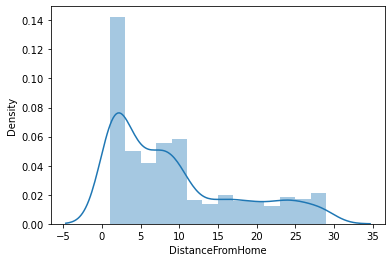

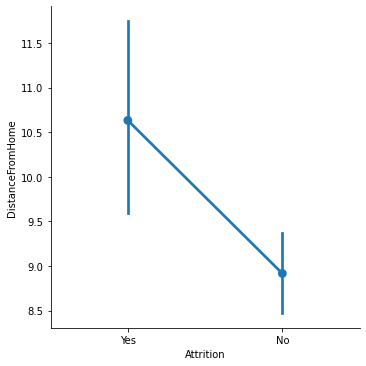

In [8]:
# DistanceFromHome
sns.distplot(data['DistanceFromHome'])
print(data.groupby('Attrition')[['DistanceFromHome']].agg(['count', 'max', 'min', 'mean', 'median']))
sns.factorplot('Attrition', 'DistanceFromHome', data=data) 

#DistanceFromHome과 Attrition은 양의 상관관계 



          StockOptionLevel                         
                     count max min      mean median
Attrition                                          
No                    1233   3   0  0.845093      1
Yes                    237   3   0  0.527426      0


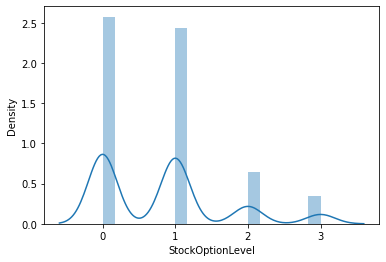

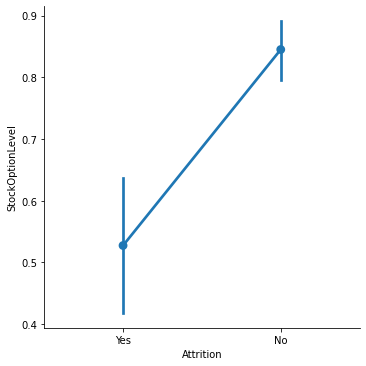

In [9]:
#StockOptionLevel

sns.distplot(data['StockOptionLevel'])
print(data.groupby('Attrition')[['StockOptionLevel']].agg(['count', 'max', 'min', 'mean', 'median']))
sns.factorplot('Attrition', 'StockOptionLevel', data=data) 

#Attrion 과 stockoptionlevel 은 음의 상관관계 

In [10]:
#연속형 변수 범주형 변수로 바꿔줌 
data['Rate_range'] = pd.qcut(data['MonthlyRate'], q=4, labels=[1,2,3,4])
data['Income_range'] = pd.qcut(data['MonthlyIncome'], q=4,labels=[1,2,3,4])
data['SalaryHike_range'] = pd.qcut(data['PercentSalaryHike'], q=4,labels=[1,2,3,4])
data['HomeDistance_range'] = pd.qcut(data['DistanceFromHome'], q=4, labels=[1,2,3,4])

data['Rate_range']=data['Rate_range'].astype('object')
data['Income_range']=data['Income_range'].astype('object')
data['SalaryHike_range']=data['SalaryHike_range'].astype('object')
data['HomeDistance_range']=data['HomeDistance_range'].astype('object')


In [27]:
data['Rate_range'] = pd.qcut(data['MonthlyRate'], q=4, labels=[1,2,3,4])
data['Income_range'] = pd.qcut(data['MonthlyIncome'], q=4,labels=[1,2,3,4])
data['SalaryHike_range'] = pd.qcut(data['PercentSalaryHike'], q=4,labels=[1,2,3,4])
data['HomeDistance_range'] = pd.qcut(data['DistanceFromHome'], q=4, labels=[1,2,3,4])

data['Rate_range']=data['Rate_range'].astype('object')
data['Income_range']=data['Income_range'].astype('object')
data['SalaryHike_range']=data['SalaryHike_range'].astype('object')
data['HomeDistance_range']=data['HomeDistance_range'].astype('object')


- Monthly Rate, DailyRate, HoulryRate는 분포도 비슷하며, Attrion에 크게 영향을 미치지 않아보임 
- Monthly Income과 Attrition은 음의 상관관계 
- DistanceFromHome과 Attrition은 양의 상관관계 
- stockoptionlevel과 Attrion은 음의 상관관계 
- PercentSalaryHike 는 Attrition과 영향을 미치지 않지만 핵심인재의 지표로 사용가능(?)

data_talent_근속년수 평균 : 5.128
data_normal_근속년수 평균 : 7.055650684931507


          YearsAtCompany                         
                   count max min      mean median
Attrition                                        
No                    98  14   0  5.734694      5
Yes                   27  13   0  2.925926      1


          YearsAtCompany                         
                   count max min      mean median
Attrition                                        
No                   977  37   0  7.382805      6
Yes                  191  40   0  5.382199      4


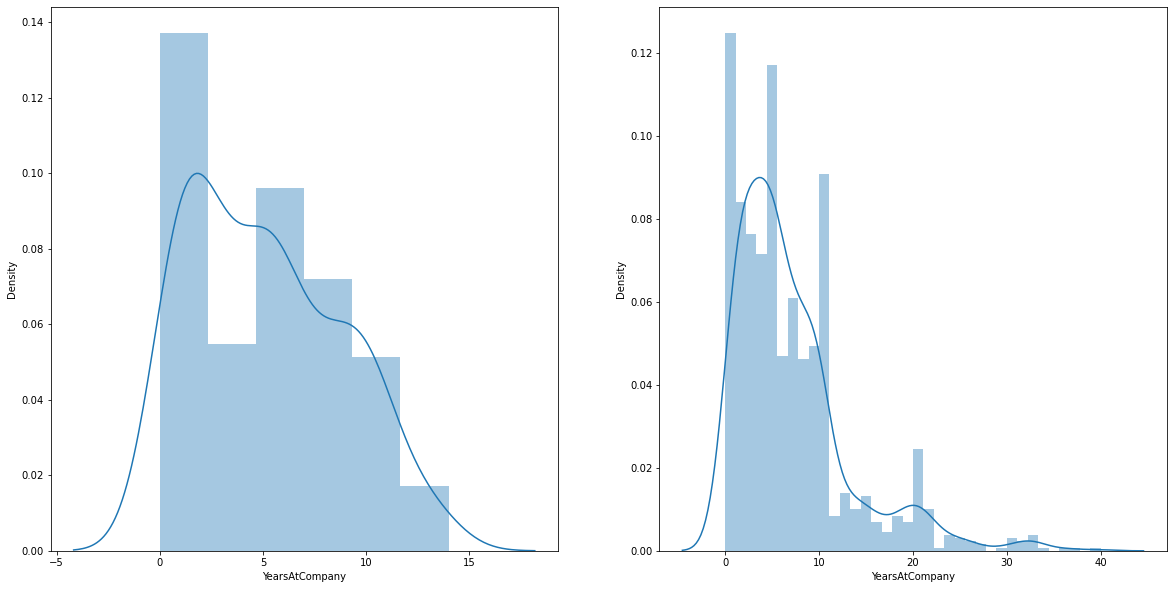

In [12]:
#우선 신입사원이라 임금 상승률이 높은 것인지 확인
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data_talent['YearsAtCompany'],ax=ax[0])
sns.distplot(data_normal['YearsAtCompany'],ax=ax[1])

print("data_talent_근속년수 평균 :", data_talent['YearsAtCompany'].mean())
print("data_normal_근속년수 평균 :", data_normal['YearsAtCompany'].mean())
print("\n")
print(data_talent.groupby('Attrition')[['YearsAtCompany']].agg(['count', 'max', 'min', 'mean', 'median']))
print("\n")
print(data_normal.groupby('Attrition')[['YearsAtCompany']].agg(['count', 'max', 'min', 'mean', 'median']))

<AxesSubplot:ylabel='Attrition'>

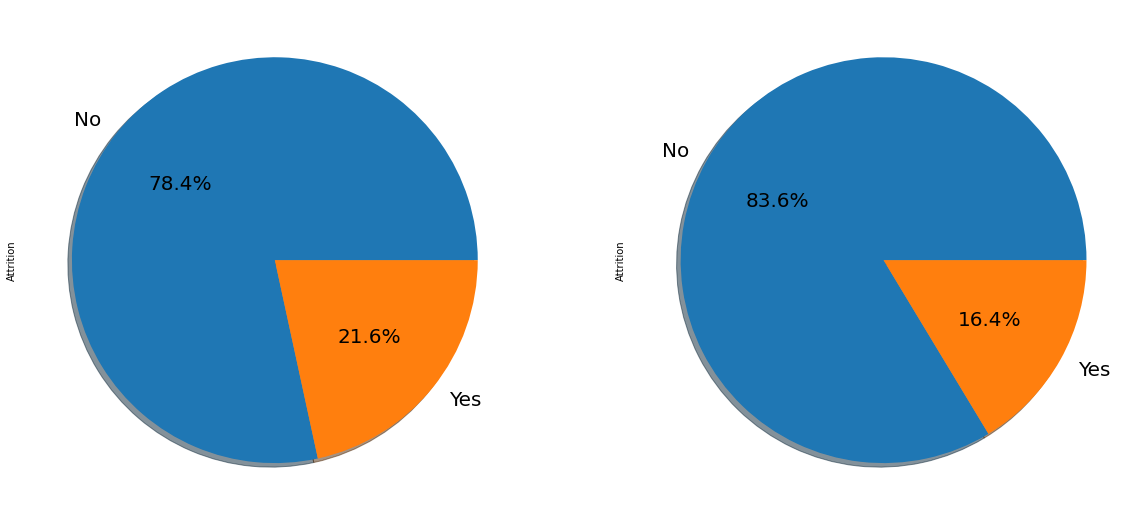

In [13]:
#퇴사율 자체는 비슷하다.
f, ax = plt.subplots(1,2, figsize=(20,20))
data_talent['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, fontsize=20)
data_normal['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True, fontsize=20)

In [36]:
data_talent["OverTime"].unique()

array([0, 1], dtype=int64)

In [38]:
data_talent["OverTime"].replace("Yes", 1, inplace=True)
data_talent["OverTime"].replace("No", 0, inplace=True)
data_normal["OverTime"].replace("Yes", 1, inplace=True)
data_normal["OverTime"].replace("No", 0, inplace=True)

In [51]:
data_talent['OverTime'].unique()

array([0, 1], dtype=int64)

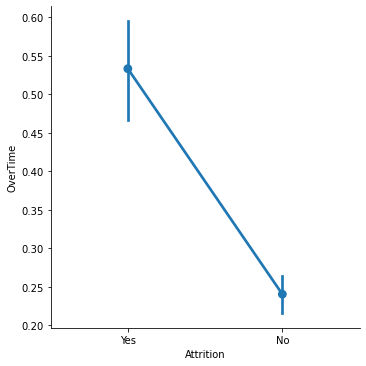

In [53]:
sns.factorplot('Attrition','OverTime',data=data_normal)
plt.show()

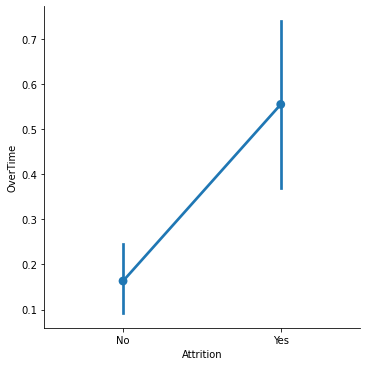

In [52]:
sns.factorplot('Attrition','OverTime',data=data_talent)
plt.show()

          OverTime                         
             count max min      mean median
Attrition                                  
No              98   1   0  0.163265      0
Yes             27   1   0  0.555556      1
          OverTime                         
             count max min      mean median
Attrition                                  
No            1135   1   0  0.240529      0
Yes            210   1   0  0.533333      1


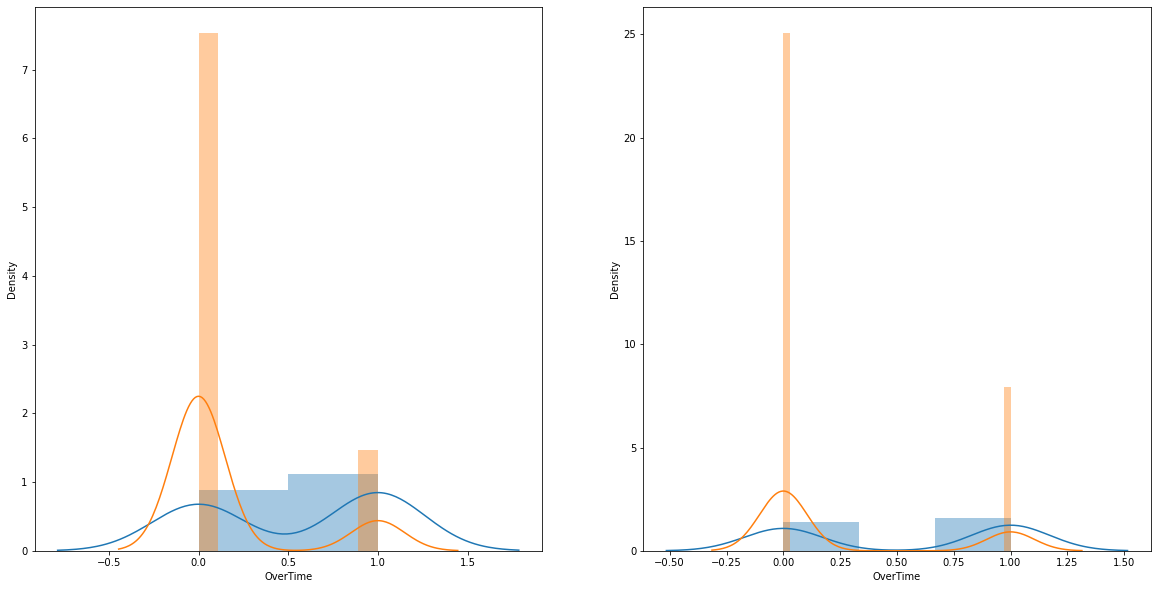

In [39]:
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data_talent[data_talent['Attrition']=='Yes']['OverTime'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']=='No']['OverTime'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']=='Yes']['OverTime'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']=='No']['OverTime'],ax=ax[1])

print(data_talent.groupby('Attrition')[['OverTime']].agg(['count', 'max', 'min', 'mean', 'median']))
print(data_normal.groupby('Attrition')[['OverTime']].agg(['count', 'max', 'min', 'mean', 'median']))

In [41]:
data_talent['StockOptionLevel'].unique()

array([1, 0, 2, 3], dtype=int64)

          StockOptionLevel                         
                     count max min      mean median
Attrition                                          
No                      98   3   0  0.867347      1
Yes                     27   3   0  0.444444      0
          StockOptionLevel                         
                     count max min      mean median
Attrition                                          
No                    1135   3   0  0.843172      1
Yes                    210   3   0  0.538095      0


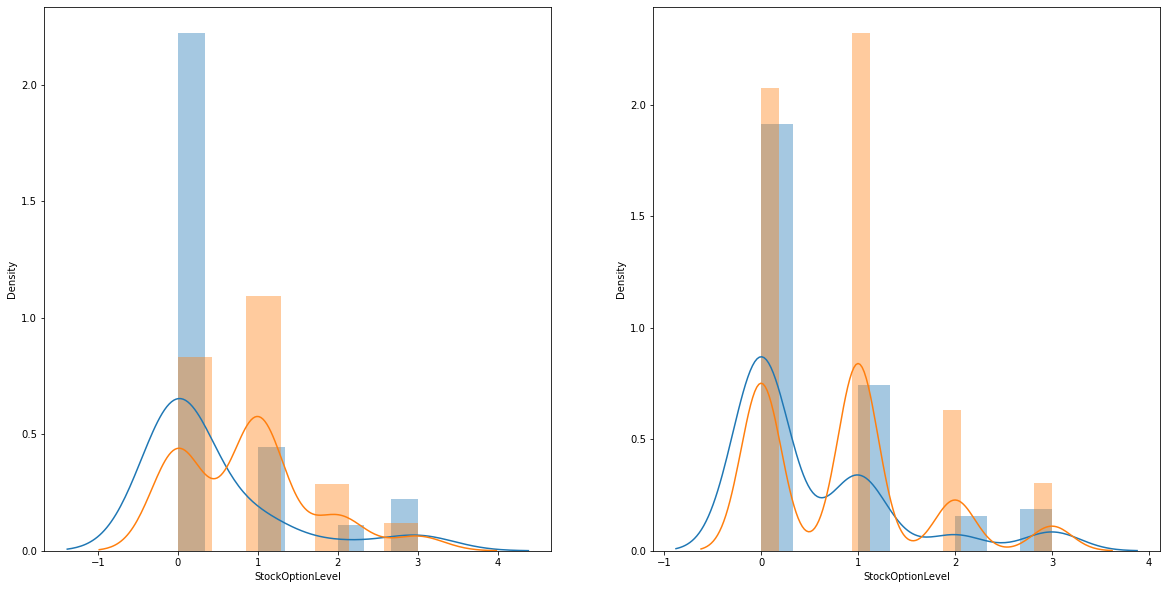

In [42]:
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data_talent[data_talent['Attrition']=='Yes']['StockOptionLevel'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']=='No']['StockOptionLevel'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']=='Yes']['StockOptionLevel'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']=='No']['StockOptionLevel'],ax=ax[1])

print(data_talent.groupby('Attrition')[['StockOptionLevel']].agg(['count', 'max', 'min', 'mean', 'median'])) #0.42
print(data_normal.groupby('Attrition')[['StockOptionLevel']].agg(['count', 'max', 'min', 'mean', 'median'])) #0.31

In [44]:
data_talent['WorkLifeBalance'].unique()

array([3, 2, 1, 4], dtype=int64)

          WorkLifeBalance                         
                    count max min      mean median
Attrition                                         
No                     98   4   1  2.724490      3
Yes                    27   4   1  2.740741      3
          WorkLifeBalance                         
                    count max min      mean median
Attrition                                         
No                   1135   4   1  2.785903      3
Yes                   210   4   1  2.647619      3


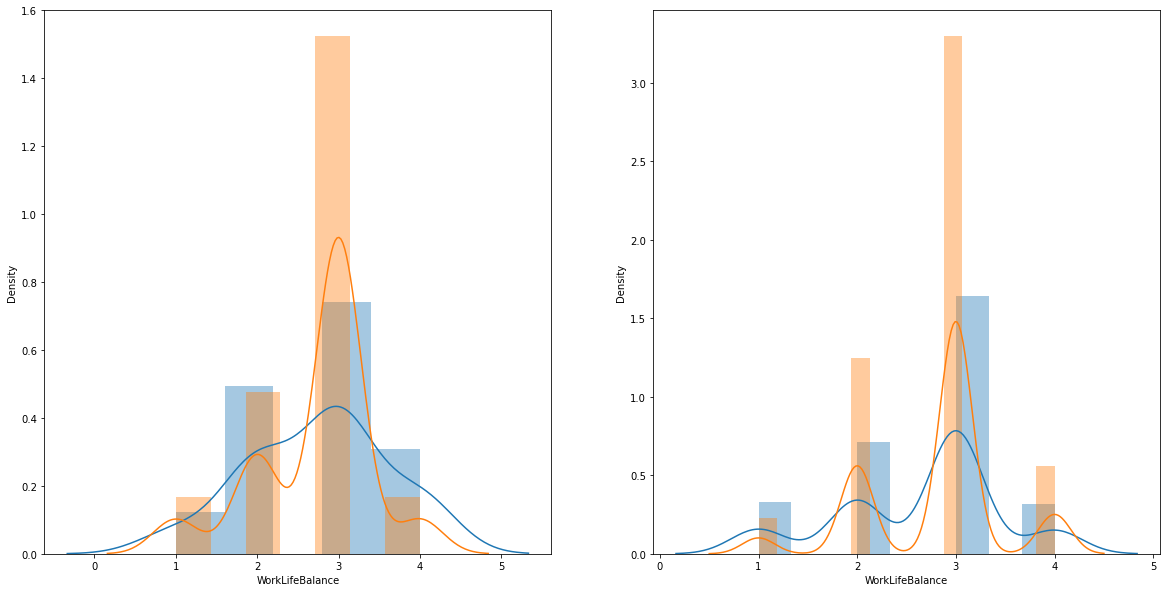

In [45]:
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data_talent[data_talent['Attrition']=='Yes']['WorkLifeBalance'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']=='No']['WorkLifeBalance'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']=='Yes']['WorkLifeBalance'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']=='No']['WorkLifeBalance'],ax=ax[1])

print(data_talent.groupby('Attrition')[['WorkLifeBalance']].agg(['count', 'max', 'min', 'mean', 'median'])) 
print(data_normal.groupby('Attrition')[['WorkLifeBalance']].agg(['count', 'max', 'min', 'mean', 'median']))

          StockOptionLevel                         
                     count max min      mean median
Attrition                                          
No                      98   3   0  0.867347      1
Yes                     27   3   0  0.444444      0
          StockOptionLevel                         
                     count max min      mean median
Attrition                                          
No                     977   3   0  0.838280      1
Yes                    191   3   0  0.549738      0


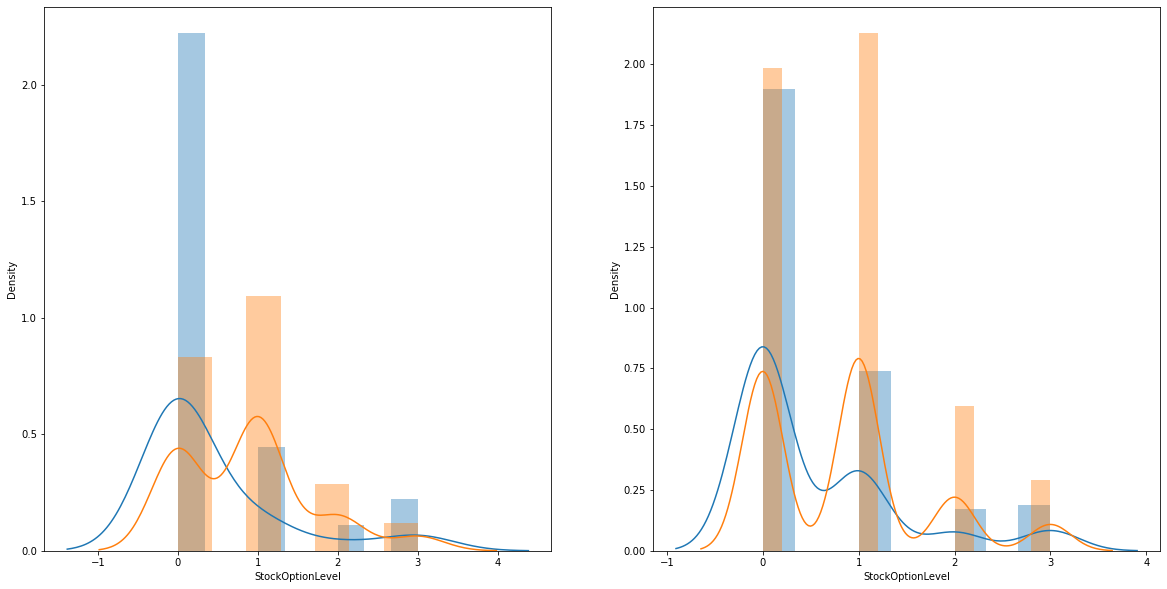

In [14]:
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(data_talent[data_talent['Attrition']=='Yes']['StockOptionLevel'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']=='No']['StockOptionLevel'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']=='Yes']['StockOptionLevel'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']=='No']['StockOptionLevel'],ax=ax[1])

print(data_talent.groupby('Attrition')[['StockOptionLevel']].agg(['count', 'max', 'min', 'mean', 'median']))
print(data_normal.groupby('Attrition')[['StockOptionLevel']].agg(['count', 'max', 'min', 'mean', 'median']))

- 핵심인재 그룹에서는 퇴사 vs 안퇴사 간의 Stockoptionlevel mean 차이가 0.44
- 아닌 그룹에서는 mean 차이가 0.29
- 임금인상률이 높은 그룹에서 Stockoptionlevel 을 이직 이유로 더 고려함을 알 수 있다. 

          HomeDistance_range                         
                       count max min      mean median
Attrition                                            
No                        98   4   1  2.397959      2
Yes                       27   4   1  2.814815      3


          HomeDistance_range                         
                       count max min      mean median
Attrition                                            
No                       977   4   1  2.399181      2
Yes                      191   4   1  2.581152      3


<AxesSubplot:xlabel='HomeDistance_range', ylabel='Density'>

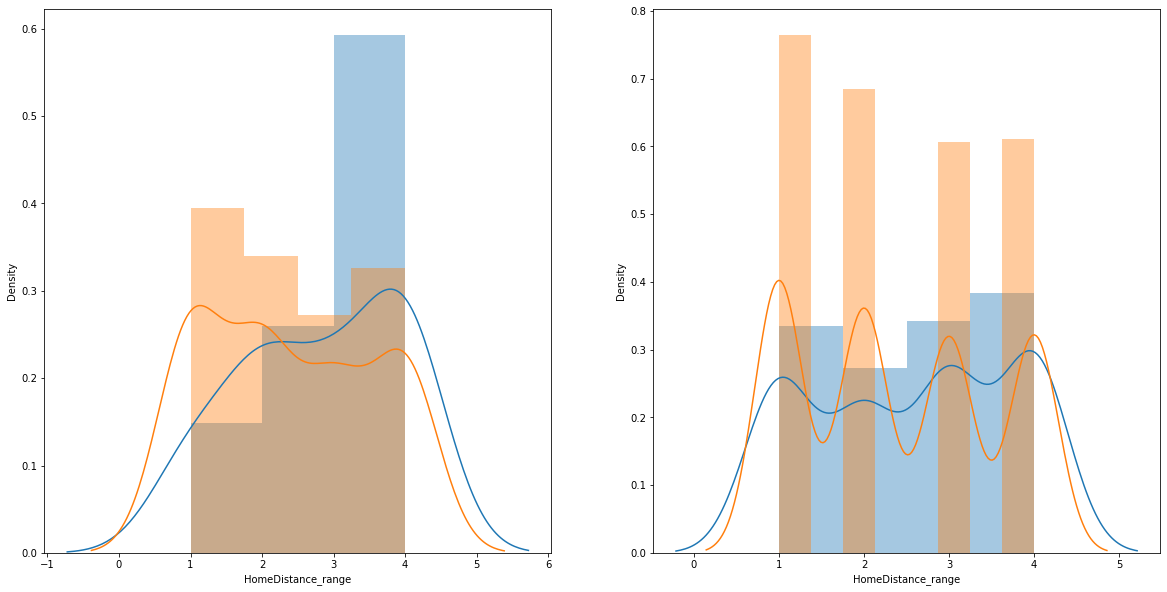

In [15]:
data_talent['HomeDistance_range']= data_talent['HomeDistance_range'].astype(int)
data_normal['HomeDistance_range']= data_normal['HomeDistance_range'].astype(int)

print(data_talent.groupby('Attrition')[['HomeDistance_range']].agg(['count', 'max', 'min', 'mean', 'median']))
print('\n')
print(data_normal.groupby('Attrition')[['HomeDistance_range']].agg(['count', 'max', 'min', 'mean', 'median']))

f, ax = plt.subplots(1,2, figsize=(20,10))
sns.distplot(data_talent[data_talent['Attrition']=='Yes']['HomeDistance_range'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']=='No']['HomeDistance_range'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']=='Yes']['HomeDistance_range'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']=='No']['HomeDistance_range'],ax=ax[1])


- 마찬가지로 연봉인상률이 높은 그룹에서 HomeDistance_range 와 이직과의 관련성이 더 크게 나타난다

          Income_range                         
                 count max min      mean median
Attrition                                      
No                  98   4   1  2.234694      2
Yes                 27   4   1  1.407407      1


          Income_range                         
                 count max min      mean median
Attrition                                      
No                 977   4   1  2.594678      3
Yes                191   4   1  2.099476      2


<AxesSubplot:xlabel='Income_range', ylabel='Density'>

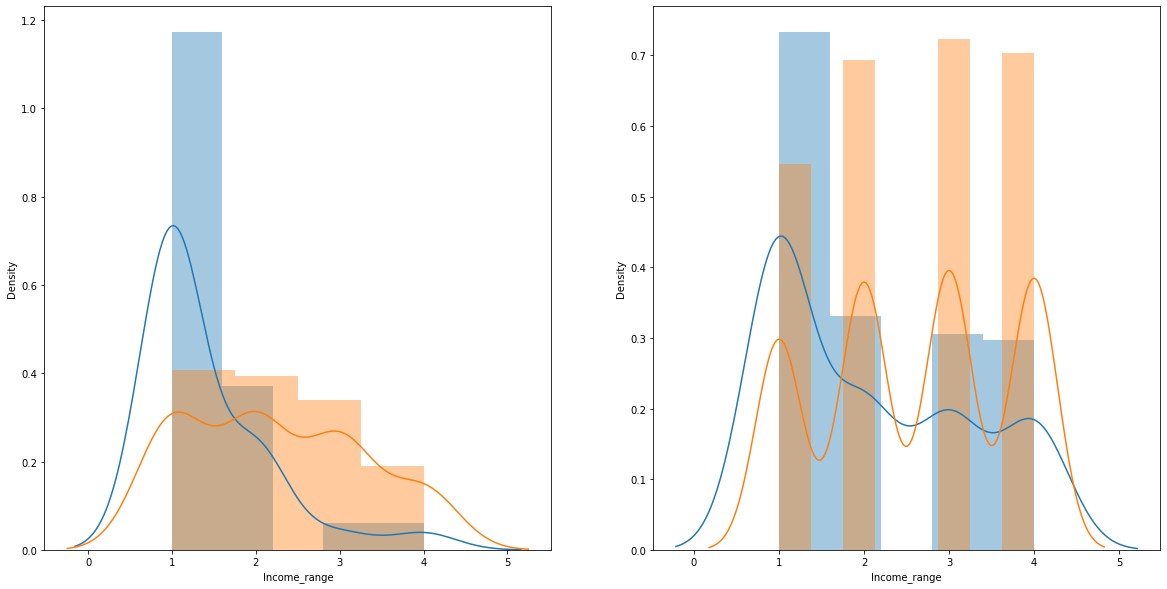

In [16]:
#똑같은 방법으로 Monthly income range 

data_talent['Income_range']= data_talent['Income_range'].astype(int)
data_normal['Income_range']= data_normal['Income_range'].astype(int)

print(data_talent.groupby('Attrition')[['Income_range']].agg(['count', 'max', 'min', 'mean', 'median']))
print('\n')
print(data_normal.groupby('Attrition')[['Income_range']].agg(['count', 'max', 'min', 'mean', 'median']))
 
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.distplot(data_talent[data_talent['Attrition']=='Yes']['Income_range'],ax=ax[0])
sns.distplot(data_talent[data_talent['Attrition']=='No']['Income_range'],ax=ax[0])

sns.distplot(data_normal[data_normal['Attrition']=='Yes']['Income_range'],ax=ax[1])
sns.distplot(data_normal[data_normal['Attrition']=='No']['Income_range'],ax=ax[1])